In [1]:
import numpy as np

from casq import PulseBackendProperties, PulseCircuit, PulseOptimizer, PulseSimulator
from casq.common import initialize_jax

initialize_jax()


In [2]:
backend_props = PulseBackendProperties("ibmq_manila")
optimizer = PulseOptimizer(
    pulse_type=PulseOptimizer.PulseType.GAUSSIAN_SQUARE,
    pulse_arguments={
        "duration": 230, "amplitude": 1, "name": "x",
        "sigma": None, "width": None
    },
    simulator=PulseSimulator.from_backend(
        backend="ibmq_manila", qubits=[0], steps=100,
        method=PulseSimulator.ODESolverMethod.SCIPY_DOP853
    ),
    target_fidelity={"0": 0, "1": 1024},
    fidelity_type=PulseOptimizer.FidelityType.COUNTS,
    target_qubit=0, jax=False, jit=False
)
optimizer_jax = PulseOptimizer(
    pulse_type=PulseOptimizer.PulseType.GAUSSIAN_SQUARE,
    pulse_arguments={
        "duration": 230, "amplitude": 1, "name": "x",
        "sigma": None, "width": None
    },
    simulator=PulseSimulator.from_backend(
        backend="ibmq_manila", qubits=[0], steps=100,
        method=PulseSimulator.ODESolverMethod.QISKIT_DYNAMICS_JAX_ODEINT,
        solver_options={"atol": 1e-6, "rtol": 1e-8, "hmax": backend_props.dt}
    ),
    target_fidelity={"0": 0, "1": 1024},
    fidelity_type=PulseOptimizer.FidelityType.COUNTS,
    target_qubit=0, jax=True, jit=False
)
optimizer_jit = PulseOptimizer(
    pulse_type=PulseOptimizer.PulseType.GAUSSIAN_SQUARE,
    pulse_arguments={
        "duration": 230, "amplitude": 1, "name": "x",
        "sigma": None, "width": None
    },
    simulator=PulseSimulator.from_backend(
        backend="ibmq_manila", qubits=[0], steps=100,
        method=PulseSimulator.ODESolverMethod.QISKIT_DYNAMICS_JAX_ODEINT,
        solver_options={"atol": 1e-6, "rtol": 1e-8, "hmax": backend_props.dt}
    ),
    target_fidelity={"0": 0, "1": 1024},
    fidelity_type=PulseOptimizer.FidelityType.COUNTS,
    target_qubit=0, jax=True, jit=True
)


2023-07-02 10:34:41.978 | DEBUG    | casq.pulse_optimizer:_build_pulse_function:168 - Building pulse with parameters = ['sigma', 'width'] and fixed arguments = {'duration': 230, 'amplitude': 1, 'name': 'x', 'jax': False}
2023-07-02 10:34:47.013 | DEBUG    | casq.pulse_optimizer:_build_pulse_function:168 - Building pulse with parameters = ['sigma', 'width'] and fixed arguments = {'duration': 230, 'amplitude': 1, 'name': 'x', 'jax': True}
2023-07-02 10:34:52.568 | DEBUG    | casq.pulse_optimizer:_build_pulse_function:168 - Building pulse with parameters = ['sigma', 'width'] and fixed arguments = {'duration': 230, 'amplitude': 1, 'name': 'x', 'jax': True}


In [3]:
initial_params = np.array([10.0, 10.0])
pulse_gate = optimizer.pulse_function(initial_params)
circuit = PulseCircuit.from_pulse(pulse_gate, backend_props.backend, 0)


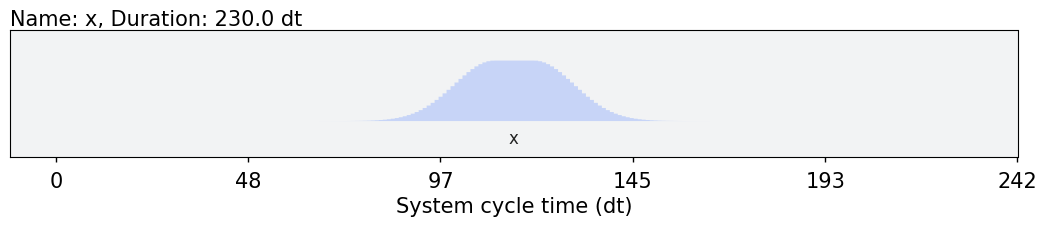

In [4]:
pulse_gate.pulse().draw()

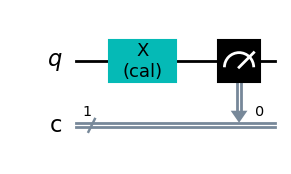

In [5]:
circuit.draw("mpl")

In [6]:
%%time
optimizer.objective_function(np.array([14.0, 11.0]))


2023-07-02 10:35:23.320 | DEBUG    | casq.pulse_optimizer:objective:141 - Result = ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts=[{'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1022, '1': 2}, {'0': 1021, '1': 3}, {'0': 1020, '1': 4}, {'0': 1017, '1': 7}, {'0': 1014, '1': 10}, {'0': 1004, '1': 20}, {'0': 979, '1': 45}, {'0': 938, '1': 86}, {'0': 857, '1': 167}, {'0': 741, '1': 283}, {'0': 586, '1': 438}, {'0': 422, '1': 602}, {'0': 264, '1': 760}, {'0': 123, '1': 901}, {'0': 32, '1': 992}, {'0': 70, '1': 954}, {'0': 205, '1': 819}, {'0': 398, '1': 626}, {'0': 610, '1': 414}, 

CPU times: user 30.1 s, sys: 142 ms, total: 30.2 s
Wall time: 30.3 s


0.013671874999999889

In [7]:
%%time
optimizer_jax.objective_function(np.array([14.0, 11.0]))


2023-07-02 10:35:24.737 | DEBUG    | casq.pulse_optimizer:objective:141 - Result = ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts=[{'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1

CPU times: user 1.38 s, sys: 45.2 ms, total: 1.43 s
Wall time: 1.41 s


1.0

In [8]:
%%time
optimizer_jit.objective_function(initial_params)


TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on the JAX Tracer object Traced<ShapedArray(complex128[3])>with<JVPTrace(level=3/0)> with
  primal = Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
  tangent = Traced<ShapedArray(complex128[3])>with<JaxprTrace(level=2/0)> with
    pval = (ShapedArray(complex128[3]), None)
    recipe = JaxprEqnRecipe(eqn_id=<object object at 0x13c4fc290>, in_tracers=(Traced<ShapedArray(complex128[1,3]):JaxprTrace(level=2/0)>,), out_tracer_refs=[<weakref at 0x13c3e5c60; to 'JaxprTracer' at 0x13c3e65c0>], out_avals=[ShapedArray(complex128[3])], primitive=squeeze, params={'dimensions': (0,)}, effects=set(), source_info=SourceInfo(traceback=<jaxlib.xla_extension.Traceback object at 0x13c505770>, name_stack=NameStack(stack=(Transform(name='jvp'),))))
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [9]:
%%time
solution = optimizer_jax.optimize(initial_params)
optimum = np.array([solution.parameters[0], solution.parameters[1]])
optimized_pulse_gate = optimizer.pulse_function(optimum)
optimized_circuit = PulseCircuit.from_pulse(optimized_pulse_gate, backend_props.backend, 0)
print(solution.message)
print(f"Optimized Sigma is {optimum[0]} and Width is {optimum[1]}")
print("Number of function evaluations: " + str(solution.num_iterations))
print("Function value: " + str(solution.fidelity))

2023-07-02 10:35:27.559 | DEBUG    | casq.pulse_optimizer:objective:141 - Result = ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts=[{'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1024}, {'0': 1

Optimization terminated successfully.
Optimized Sigma is 10.0 and Width is 10.0
Number of function evaluations: 55
Function value: 1.0
CPU times: user 55.7 s, sys: 2.02 s, total: 57.7 s
Wall time: 56.8 s


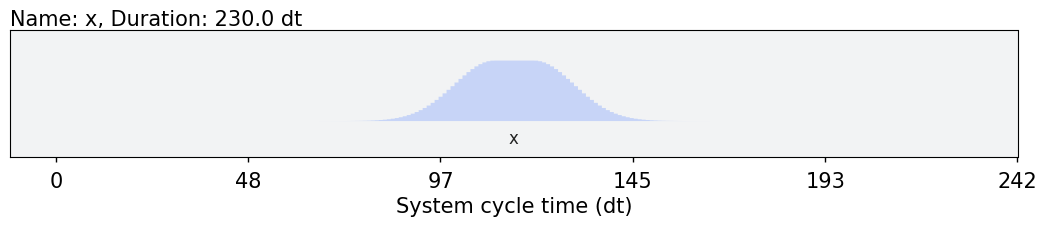

In [10]:
optimized_pulse_gate.pulse().draw()


In [11]:
%%time
result = optimizer_jax.simulator.run(optimized_circuit)
print(result.result().results[0].data.counts[-1])


{'0': 1024}
CPU times: user 1.03 s, sys: 48.2 ms, total: 1.08 s
Wall time: 1 s
